# Implementing XGBoost in Python

# Load the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk(r"C:\Users\Prachi\Documents\VS Code Files\Machine Learning\Classification\XGBoost" ):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\Prachi\Documents\VS Code Files\Machine Learning\Classification\XGBoost\Churn_Modelling.csv
C:\Users\Prachi\Documents\VS Code Files\Machine Learning\Classification\XGBoost\Wholesale customers data.csv
C:\Users\Prachi\Documents\VS Code Files\Machine Learning\Classification\XGBoost\xgboost+k-foldcv+customers.ipynb
C:\Users\Prachi\Documents\VS Code Files\Machine Learning\Classification\XGBoost\xg_boost.ipynb


# Read the Dataset

In [5]:
data = 'Wholesale customers data.csv'
df = pd.read_csv(data)

# EDA

In [6]:
df.shape

(440, 8)

In [7]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Declare feature vector and target variable

In [11]:
X = df.drop('Channel', axis=1)

y = df['Channel']

In [12]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [13]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

In [14]:
# convert labels into binary values
y[y==2] = 0
y[y==1] = 1

In [15]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

In [16]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X, label=y)

# Split data into separate training and test set

In [17]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


# Train the XGBoost Classifier

In [19]:
# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
    'objective':'binary:logistic',
    'max_depth':4,
    'alpha':10,
    'learning_rate':1.0,
    'n_estimators':100
}

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [20]:
# we can view the parameters of the xgb trained model as follows -

print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)


# Make predictions with XGBoost Classifier

In [21]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)


# Check accuracy score

In [23]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


XGBoost model accuracy score: 0.8788


# K-FOLD Cross Validation using XGBoost

In [24]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [25]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.910513,0.018908,0.880462,0.031429
1,0.934900,0.013845,0.905549,0.029103
2,0.934448,0.014780,0.900733,0.030765
3,0.937147,0.014482,0.907904,0.023878
4,0.946479,0.004300,0.931468,0.017682


# Featues importance with XGBoost

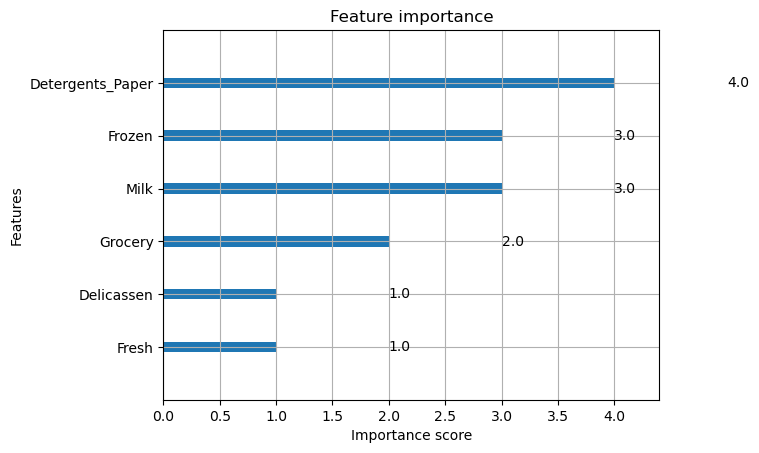

<Figure size 1600x1200 with 0 Axes>

In [26]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()
